<a href="https://colab.research.google.com/github/vincent4u/Assignment-Code/blob/master/Case_study2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()           #uploading the csv file from my desktop

Saving dataBiomass_CE880_1.csv to dataBiomass_CE880_1.csv


## **Importing Libraries**

In [193]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
np.random.seed(42)

### 1.0 Reading the CSV_file

In [194]:
df=pd.read_csv("/content/dataBiomass_CE880_1.csv")    #assiging the CSV file as df

# 2.0 Analysing the csv file

In [195]:
df1=df.iloc[0:336,1:16]             #removing the column 'number'
df1

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,0.46,0.29,0.25,665.0,1.0,0.25,0.00,0.22,9.70,48.24,35.03,7.03,9.65,24.0,0.0
1,0.46,0.29,0.25,744.0,1.0,0.30,0.00,0.22,10.13,40.05,43.48,6.35,8.42,21.7,0.0
2,0.46,0.29,0.25,811.0,1.0,0.35,0.00,0.22,9.61,36.16,48.61,5.62,7.61,19.0,0.0
3,0.46,0.29,0.25,670.0,1.0,0.25,0.00,0.28,9.69,46.99,37.26,6.06,9.14,29.6,0.0
4,0.46,0.29,0.25,750.0,1.0,0.30,0.00,0.28,9.37,39.76,45.36,5.51,8.00,27.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.55,0.16,0.29,830.0,1.0,0.32,1.10,3.70,20.68,32.09,38.38,8.85,4.71,26.5,12.8
332,0.50,0.25,0.25,837.0,1.0,0.38,1.50,3.70,22.26,31.78,37.16,8.80,4.97,34.6,11.3
333,0.55,0.16,0.29,750.0,1.1,0.00,0.75,0.25,5.40,42.69,44.49,7.43,13.40,8.0,2.0
334,0.55,0.16,0.29,750.0,1.1,0.00,0.82,0.25,6.00,31.92,56.51,5.57,11.50,8.0,1.2


In [196]:
## finding information on the null Value counts, column names,data types and Memory usage

df1.info(verbose=True)              #results shows that there are no null_values at first,
                                    #however, upon manual observation of the dataset there are a number of zeros in some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Cellulose                    336 non-null    float64
 1   Hemicellulose                336 non-null    float64
 2   Lignin                       336 non-null    float64
 3   Temp                         336 non-null    float64
 4   Pressure                     336 non-null    float64
 5   Equivalance mass ratio       336 non-null    float64
 6   Steam to biomass mass ratio  336 non-null    float64
 7   Superficial gas velocity     336 non-null    float64
 8   H2                           336 non-null    float64
 9   CO                           336 non-null    float64
 10  CO2                          336 non-null    float64
 11  CH4                          336 non-null    float64
 12  Lower heating value          336 non-null    float64
 13  Char yield          

In [197]:
df1.describe()

,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
count,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000,336.000000
mean,0.452768,0.281012,0.266637,752.547530,1.246518,0.181250,0.578036,0.747321,25.997113,31.618393,31.782500,10.581607,6.813780,11.288274,16.546964
std,0.080908,0.088878,0.087562,85.306424,0.949579,0.166888,1.134756,1.221580,10.132765,6.825788,8.802649,3.978859,2.820859,10.626659,22.510650
min,0.200000,0.080000,0.100000,600.000000,1.000000,0.000000,0.000000,0.020000,5.390000,5.010000,6.780000,1.310000,1.740000,0.000000,0.000000
25%,0.440000,0.250000,0.200000,657.500000,1.000000,0.000000,0.000000,0.190000,20.642500,27.622500,25.132500,7.797500,4.867500,3.200000,0.010000
50%,0.450000,0.290000,0.250000,780.000000,1.000000,0.230000,0.330000,0.555000,26.405000,32.575000,30.475000,9.535000,6.560000,6.880000,6.640000
75%,0.500000,0.330000,0.300000,815.000000,1.000000,0.300000,0.700000,0.710000,31.065000,35.927500,36.840000,13.702500,8.322500,17.900000,25.100000
max,0.580000,0.630000,0.490000,900.000000,10.000000,0.860000,8.030000,9.590000,66.030000,55.440000,62.560000,20.120000,14.960000,45.000000,134.100000


In [198]:
##creating a copy of the original df1, any changes made on the copy will not affect the original data ie.df1
df1_copy=df1.copy(deep=True)
df1_copy.head()


,Cellulose,Hemicellulose,Lignin,Temp,Pressure,Equivalance mass ratio,Steam to biomass mass ratio,Superficial gas velocity,H2,CO,CO2,CH4,Lower heating value,Char yield,tar yield
0,0.46,0.29,0.25,665.0,1.0,0.25,0.0,0.22,9.70,48.24,35.03,7.03,9.65,24.0,0.0
1,0.46,0.29,0.25,744.0,1.0,0.30,0.0,0.22,10.13,40.05,43.48,6.35,8.42,21.7,0.0
2,0.46,0.29,0.25,811.0,1.0,0.35,0.0,0.22,9.61,36.16,48.61,5.62,7.61,19.0,0.0
3,0.46,0.29,0.25,670.0,1.0,0.25,0.0,0.28,9.69,46.99,37.26,6.06,9.14,29.6,0.0
4,0.46,0.29,0.25,750.0,1.0,0.30,0.0,0.28,9.37,39.76,45.36,5.51,8.00,27.4,0.0


In [199]:
##There are a number of columns with zeros, zero's probably indicates missing/null values, therefore we need to observe the counts.
print((df1_copy==0).sum(axis=0))   ##observing and printing the zeros counts recorded per column of the dataset

Cellulose                        0
Hemicellulose                    0
Lignin                           0
Temp                             0
Pressure                         0
Equivalance mass ratio         134
Steam to biomass mass ratio    144
Superficial gas velocity         0
H2                               0
CO                               0
CO2                              0
CH4                              0
Lower heating value              0
Char yield                       3
tar yield                       82
dtype: int64


# 3.0 Model testing

In [200]:
target=df1_copy.iloc[0:336,8:16]
input_df=df1_copy.iloc[0:336,0:8]

In [201]:
from sklearn.model_selection import train_test_split
 #Splitting the data into 70%, 15%, and 15% splits
input_train, input_test, target_train, target_test = train_test_split(input_df, target, test_size=0.2, random_state=1)


# Converting the lists to NumPy arrays
input_train = np.array(input_train)
input_test = np.array(input_test)
target_train = np.array(target_train)
target_test = np.array(target_test)

# Normalizing on input_train
input_train_min = np.min(input_train)
input_train_max = np.max(input_train)
input_train_normalized = (input_train - input_train_min) / (input_train_max - input_train_min)
X_train=input_train_normalized


# Normalizing on input_test
input_test_min = np.min(input_test)
input_test_max = np.max(input_test)
input_test_normalized = (input_test - input_test_min) / (input_test_max - input_test_min)
X_test=input_test_normalized

# Normalizing on target_train
target_train_min = np.min(target_train)
target_train_max = np.max(target_train)
target_train_normalized = (target_train - target_train_min) / (target_train_max - target_train_min)
y_train=target_train_normalized

target_test_min = np.min(target_test)
target_test_max = np.max(target_test)
target_test_normalized = (target_test - target_test_min) / (target_test_max - target_test_min)
y_test=target_test_normalized

print(X_train)

[[4.77777778e-04 3.77777778e-04 2.55555556e-04 ... 0.00000000e+00
  1.11111111e-03 8.11111111e-04]
 [5.44444444e-04 2.66666667e-04 3.11111111e-04 ... 0.00000000e+00
  1.33333333e-03 2.33333333e-04]
 [6.11111111e-04 1.77777778e-04 3.22222222e-04 ... 2.66666667e-04
  0.00000000e+00 4.66666667e-04]
 ...
 [3.55555556e-04 2.11111111e-04 5.44444444e-04 ... 0.00000000e+00
  5.56666667e-03 6.66666667e-05]
 [4.77777778e-04 3.77777778e-04 2.55555556e-04 ... 0.00000000e+00
  3.66666667e-04 6.77777778e-04]
 [5.00000000e-04 3.66666667e-04 2.44444444e-04 ... 2.11111111e-04
  0.00000000e+00 7.77777778e-05]]


In [203]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from numpy import absolute
from numpy import mean
from numpy import std
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
np.random.seed(42)
from sklearn.model_selection import GridSearchCV



# Define model
#model = KNeighborsRegressor()

# define model
model = DecisionTreeRegressor()
# define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model.fit(X_train, y_train)

# # evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# # force the scores to be positive
n_scores = absolute(n_scores)

#model.fit(X_train, y_train)

# Get predictions for training data
y_train_pred = model.predict(X_train)




# # define model
# model = DecisionTreeRegressor()
# # fit model
# #model.fit(X, y)

# # Fit model
# model.fit(X_train, y_train)

# # Make predictions on X_test
# yhat_test = model.predict(X_test)

# Calculate RMSE for each output
rmse = np.sqrt(mean_squared_error(y_test, yhat_test, multioutput='raw_values'))
print("RMSE:", rmse)

# Calculate R^2 score for each output
r2 = r2_score(y_test, yhat_test, multioutput='raw_values')
print("R^2 Score:", r2)

RMSE: [0.08016208 0.05081507 0.05982558 0.01636024 0.01573583 0.05261658
 0.13957077]
R^2 Score: [-0.14213403  0.14680747  0.23168734  0.66134672  0.51667578  0.52629383
  0.45866617]


In [215]:

# Define model
model = DecisionTreeRegressor()

# Define the evaluation procedure
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Evaluate the model and collect the scores
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

# Force the scores to be positive
n_scores = np.absolute(n_scores)

# Fit the model
model.fit(X_train, y_train)

# Get predictions for training data
y_train_pred = model.predict(X_train)

# # Calculate RMSE for each target column in y_train_pred
# rmse_scores_train = np.sqrt(mean_squared_error(y_train, y_train_pred, multioutput='raw_values'))

# # Calculate R2 score for each target column in y_train_pred
# r2_scores_train = r2_score(y_train, y_train_pred, multioutput='raw_values')

# # Print RMSE and R2 scores for each target column in y_train_pred
# print("Training Set:")
# for i in range(len(rmse_scores_train)):
#     print(f'Target {i+1}')
#     print('RMSE:', rmse_scores_train[i])
#     print('R2:', r2_scores_train[i])
#     print()


# Get predictions for training data
y_train_pred = model.predict(X_test)

# Calculate RMSE for each target column in y_train_pred
rmse_scores_train = np.sqrt(mean_squared_error(y_test, y_train_pred, multioutput='raw_values'))
print("RMSE:", rmse_scores_train)

# Calculate R2 score for each target column in y_train_pred
r2_scores_train = r2_score(y_test, y_train_pred, multioutput='raw_values')
print("R^2 Score:", r2_scores_train)

RMSE: [0.08011337 0.05065614 0.05875268 0.01617077 0.015805   0.05723229
 0.13952849]
R^2 Score: [-0.14074628  0.15213593  0.25899794  0.66914561  0.51241732  0.43953832
  0.45899409]


In [214]:

# Assuming you have X_train, y_train as the training data

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],  # List of values to try for the 'n_neighbors' hyperparameter
    'weights': ['uniform', 'distance'],  # List of values to try for the 'weights' hyperparameter
}

# Create the K-nearest neighbors regressor object
knn = KNeighborsRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Make predictions on the test data using the best_model
y_pred = best_model.predict(X_test)

 # Calculate RMSE for each target column in y_test_pred
rmse_scores = np.sqrt(mean_squared_error(y_test, y_pred, multioutput='raw_values'))
print("RMSE Scores:", rmse_scores)

    # Calculate R2 score for each target column in y_test_pred
r2_scores = r2_score(y_test, y_pred, multioutput='raw_values')
print("R^2 Scores:", r2_scores)

Best Hyperparameters: {'n_neighbors': 3, 'weights': 'distance'}
RMSE Scores: [0.08460227 0.05587683 0.06037903 0.02036023 0.01854289 0.07417807
 0.14681445]
R^2 Scores: [-0.27216406 -0.03163373  0.21740623  0.47550535  0.32885819  0.05851209
  0.40101792]


In [141]:

# Assuming you have X_train, y_train as the training data

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],  # List of values to try for the 'max_depth' hyperparameter
    'min_samples_split': [2, 5, 10],  # List of values to try for the 'min_samples_split' hyperparameter
}

# Create the Decision Tree regressor object
dt = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found during grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Now you can use the best_model for predictions or further analysis

Best Hyperparameters: {'max_depth': 7, 'min_samples_split': 10}


In [210]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RepeatedKFold
import numpy as np

# Define the models
models = {'Decision Tree': DecisionTreeRegressor(),'Random Forest': RandomForestRegressor(),'SVR': SVR()}

# Define the parameter grids for each model
param_grids = {'Decision Tree': {'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4] },'Random Forest': { 'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]},'SVR': {'C': [1, 10, 100], 'epsilon': [0.1, 0.2, 0.3] }}

# Define the cross-validation strategy
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform GridSearchCV for each model
for model_name, model in models.items():
    print(f"Model: {model_name}")

    # Create the GridSearchCV instance
    grid_search = GridSearchCV(model, param_grids[model_name], scoring='neg_mean_absolute_error', cv=cv)

    # Fit the GridSearchCV instance to the training data
    grid_search.fit(X_train, y_train)

    # Get the best model and its hyperparameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Evaluate the best model on the test data
    y_test_pred = best_model.predict(X_test)

    # Calculate MAE for each target column in y_test_pred
    mae_scores = np.abs(y_test - y_test_pred).mean(axis=0)
    print("MAE Scores:", mae_scores)

    # Calculate RMSE for each target column in y_test_pred
    rmse_scores = np.sqrt(mean_squared_error(y_test, y_test_pred, multioutput='raw_values'))
    print("RMSE Scores:", rmse_scores)

    # Calculate R2 score for each target column in y_test_pred
    r2_scores = r2_score(y_test, y_test_pred, multioutput='raw_values')
    print("R^2 Scores:", r2_scores)

    print("Best Model Hyperparameters:", best_params)
    print()

Model: Decision Tree
MAE Scores: [0.0463609  0.03914433 0.03937427 0.0125997  0.01189609 0.04392092
 0.05870467]
RMSE Scores: [0.08429273 0.05265223 0.05684493 0.01876547 0.0156136  0.06958973
 0.12561193]
R^2 Scores: [-0.26287192  0.0839996   0.30633861  0.5544518   0.52415507  0.17138252
  0.56153186]
Best Model Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model: Random Forest
MAE Scores: [0.03620332 0.03477058 0.0332431  0.01112263 0.01106245 0.0315483
 0.05515384]
RMSE Scores: [0.06340732 0.0434886  0.04528055 0.01454636 0.01507452 0.04779893
 0.10029461]
R^2 Scores: [0.28540834 0.37509663 0.55986339 0.73227795 0.55644622 0.609069
 0.72046808]
Best Model Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Model: SVR


KeyError: ignored

In [44]:
##selecting the columns with zero vlaues and replacing the zeros with nan for further processing and decision making

df1_copy[['Equivalance mass ratio','Steam to biomass mass ratio','Char yield','tar yield']] = df1_copy[['Equivalance mass ratio','Steam to biomass mass ratio','Char yield','tar yield']].replace(0,np.NaN)
print(df1_copy.isnull().sum())     #this would reveal the counts of Null values per column.

Cellulose                        0
Hemicellulose                    0
Lignin                           0
Temp                             0
Pressure                         0
Equivalance mass ratio         134
Steam to biomass mass ratio    144
Superficial gas velocity         0
H2                               0
CO                               0
CO2                              0
CH4                              0
Lower heating value              0
Char yield                       3
tar yield                       82
dtype: int64


In [59]:
# Calculating the percentage of missing values for each variable
missing_percentage = df1_copy.isnull().sum() / len(df) * 100

# Create a new DataFrame to store the missing percentage
missing_df = pd.DataFrame({'Variables': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Sort the DataFrame by missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Print the missing percentage for each variable
print(missing_df)

                      Variables  Missing Percentage
6   Steam to biomass mass ratio           42.857143
5        Equivalance mass ratio           39.880952
14                    tar yield           24.404762
13                   Char yield            0.892857
0                     Cellulose            0.000000
1                 Hemicellulose            0.000000
2                        Lignin            0.000000
3                          Temp            0.000000
4                      Pressure            0.000000
7      Superficial gas velocity            0.000000
8                            H2            0.000000
9                            CO            0.000000
10                          CO2            0.000000
11                          CH4            0.000000
12          Lower heating value            0.000000


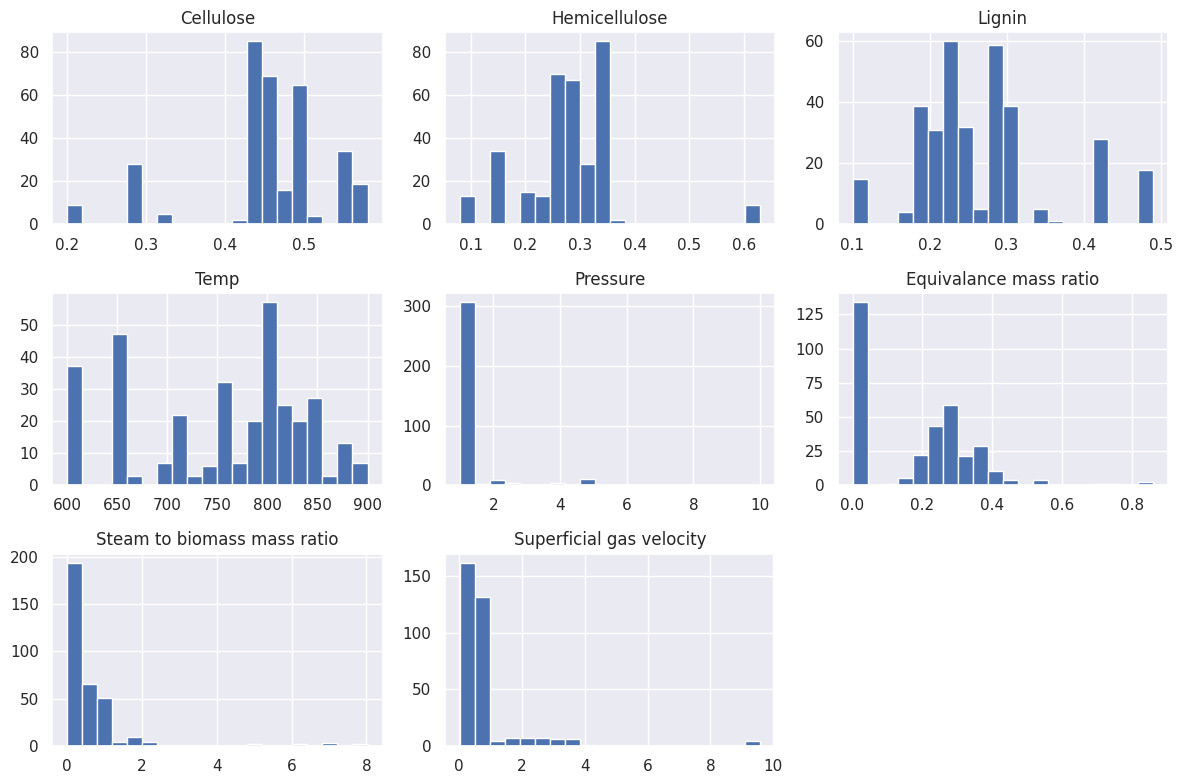

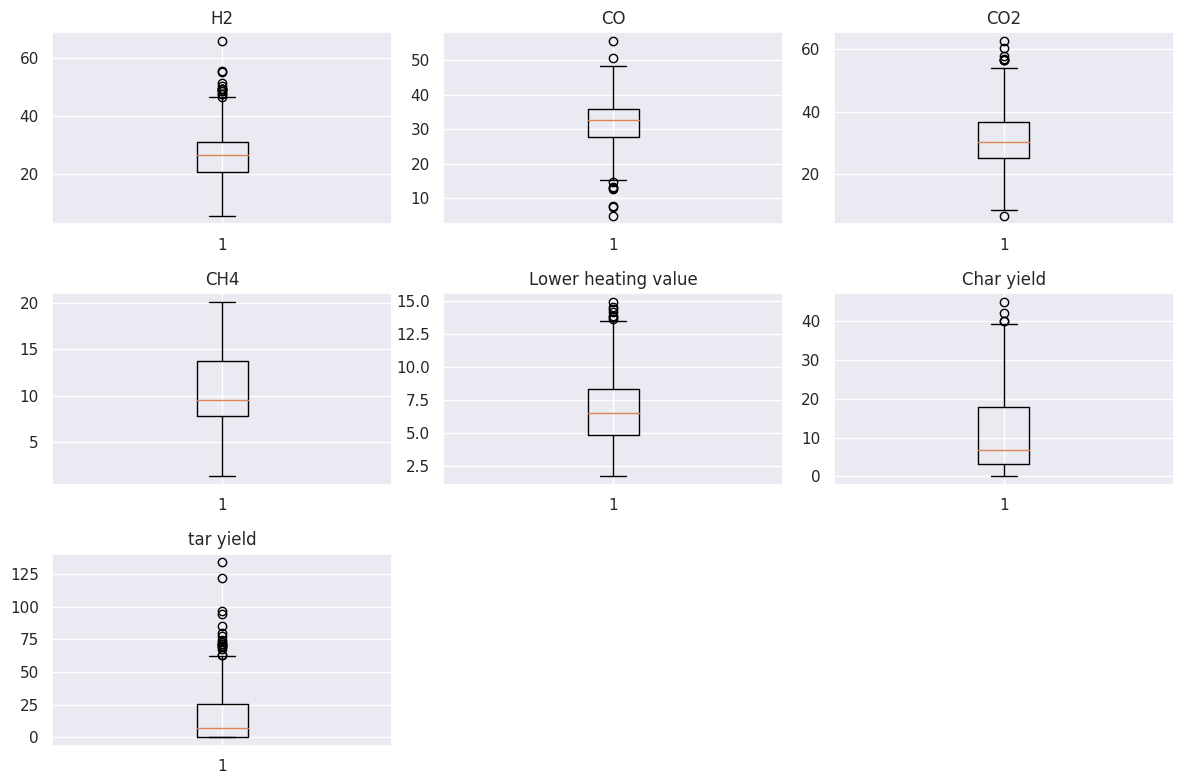

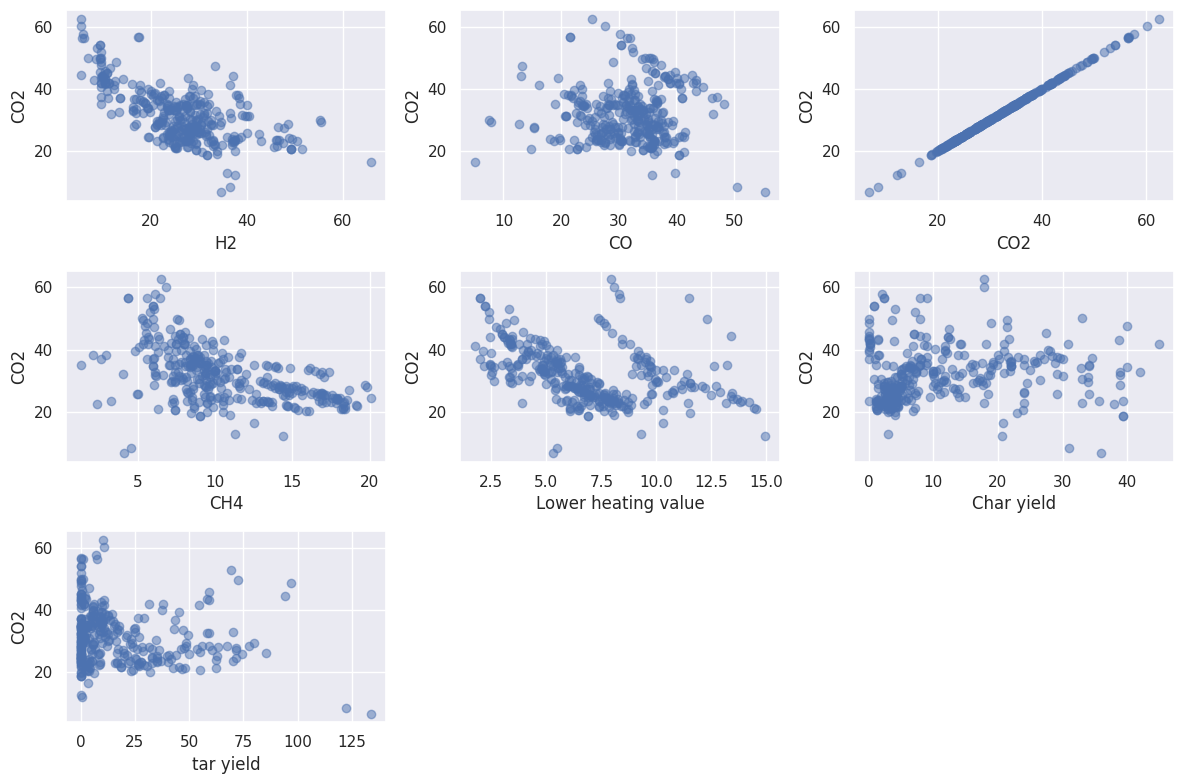

In [64]:

input_vars = ['Cellulose', 'Hemicellulose', 'Lignin', 'Temp', 'Pressure', 'Equivalance mass ratio', 'Steam to biomass mass ratio', 'Superficial gas velocity']
output_vars = ['H2', 'CO', 'CO2', 'CH4', 'Lower heating value', 'Char yield', 'tar yield']

# Visualizing the input variables (histograms)
plt.figure(figsize=(12, 8))
for i, var in enumerate(input_vars):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[var], bins=20)
    plt.title(var)
plt.tight_layout()
plt.show()

# Visualizing the output variables (box plots)
plt.figure(figsize=(12, 8))
for i, var in enumerate(output_vars):
    plt.subplot(3, 3, i + 1)
    plt.boxplot(df[var])
    plt.title(var)
plt.tight_layout()
plt.show()

# Visualize input-output relationships (scatter plots)
plt.figure(figsize=(12, 8))
for i, var in enumerate(output_vars):
    plt.subplot(3, 3, i + 1)
    plt.scatter(df[var], df[output_vars[2]], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel(output_vars[2])
plt.tight_layout()
plt.show()